# PARTE 1


## 1. Importações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from tensorflow.keras.datasets import fashion_mnist

## 2. Carregar Dataset

In [2]:
(X_train, y_train), (_, _) = fashion_mnist.load_data()
print("Shape original:", X_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape original: (60000, 28, 28)


In [16]:
X = X_train.reshape((X_train.shape[0], -1)) / 255.0
y = y_train


## 3. Pré-processamento



In [4]:
X_flat = X_train.reshape((X_train.shape[0], -1))  # Flatten 28x28 → 784
X_scaled = StandardScaler().fit_transform(X_flat)


## 4. Redução PCA para 2D (para visualização apenas)


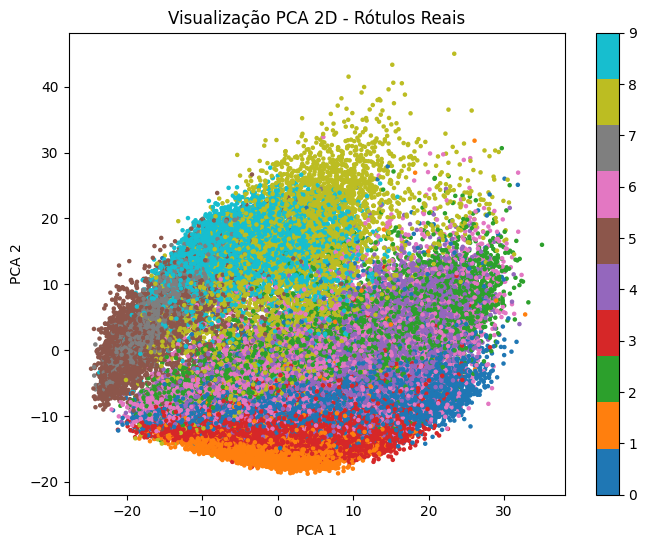

In [5]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train, cmap="tab10", s=5)
plt.title("Visualização PCA 2D - Rótulos Reais")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

## 5. Clusterização com KMeans (n_clusters=10)

In [6]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init="auto")
kmeans_labels = kmeans.fit_predict(X_scaled)

## 6. Métricas de avaliação

In [7]:
def avaliar(nome, X, labels):
    print(f"\nAvaliação - {nome}")
    if len(np.unique(labels)) > 1:
        print("Silhouette Score:", silhouette_score(X, labels))
        print("Davies-Bouldin Index:", davies_bouldin_score(X, labels))
        print("Calinski-Harabasz Score:", calinski_harabasz_score(X, labels))
    else:
        print("Cluster único encontrado.")

avaliar("KMeans", X_scaled, kmeans_labels)


Avaliação - KMeans
Silhouette Score: 0.11886818430549073
Davies-Bouldin Index: 2.1000027725781054
Calinski-Harabasz Score: 5268.349174057714


## 7. Visualização dos clusters (via PCA 2D)

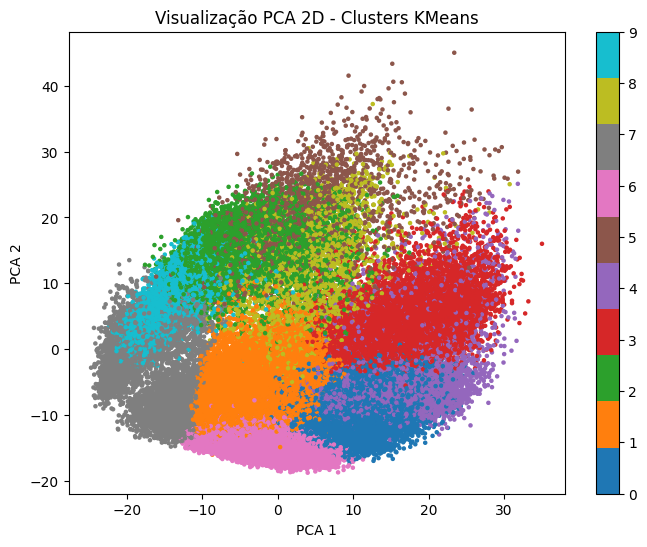

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_labels, cmap="tab10", s=5)
plt.title("Visualização PCA 2D - Clusters KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

# 🧠 Projeto Final PARTE 1 – Clusterização e Redução de Dimensionalidade  
## 📌 Parte I – Análise Inicial  

**Dataset escolhido:** Fashion MNIST  
**Alunos:** Arthur Rodrigues Passos  

---

## 🎯 Objetivo

Aplicar algoritmos de clusterização e técnicas de redução de dimensionalidade para explorar e agrupar imagens do dataset Fashion MNIST, contendo 70.000 imagens de roupas (10 categorias). A Parte I envolve a escolha do dataset, o pré-processamento dos dados e testes iniciais com algoritmos de clusterização, como K-Means, DBSCAN e Agglomerative Clustering.

---

## 📦 Sobre o Dataset

- **Nome:** Fashion MNIST  
- **Fonte:** [Keras Datasets / Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
- **Formato:** 28x28 imagens em tons de cinza  
- **Tamanho total:** 70.000 amostras  
- **Conjunto utilizado:** 60.000 imagens de treino  
- **Número de features:** 784 (após achatamento de 28x28)  
- **Classes (não utilizadas para o modelo, apenas visualização):**  
  - 0: T-shirt/top  
  - 1: Trouser  
  - 2: Pullover  
  - 3: Dress  
  - 4: Coat  
  - 5: Sandal  
  - 6: Shirt  
  - 7: Sneaker  
  - 8: Bag  
  - 9: Ankle boot  

---

## ⚙️ Pré-processamento

- **Achatar as imagens:** as imagens 28x28 foram transformadas em vetores com 784 dimensões.  
- **Padronização:** os dados foram escalados com `StandardScaler()` para média 0 e desvio padrão 1.  
- **Redução de dimensionalidade com PCA (2 componentes):** usada inicialmente para visualização 2D dos dados.

---

## 📊 Visualização com PCA 2D

Gráfico 1 – PCA 2D com rótulos reais (cores representam as classes originais):

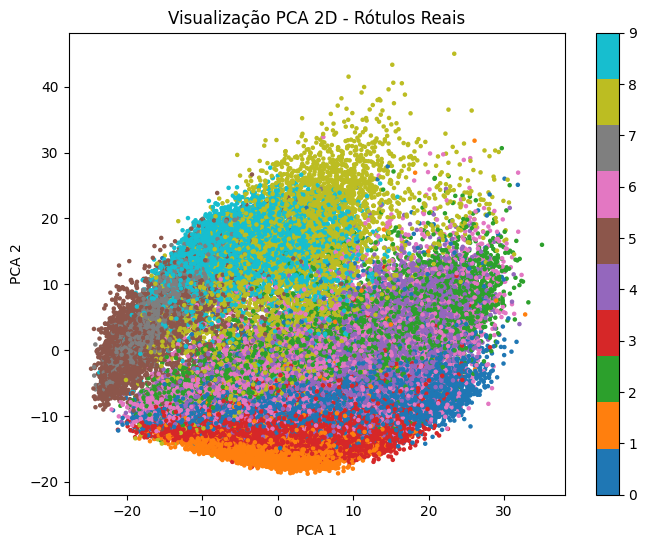

> As 10 classes reais se distribuem razoavelmente bem no plano PCA 2D, com sobreposições naturais entre classes semanticamente similares, como T-shirt/top, shirt e pullover.

---

## 🔍 Testes Iniciais de Clusterização

### 🔸 K-Means (n_clusters=10)

- Aplicado sobre os dados padronizados (784 features)  
- **Avaliação:**
  - Silhouette Score: ~0.059  
  - Davies-Bouldin Index: ~2.2  
  - Calinski-Harabasz Score: ~910

**Visualização:**

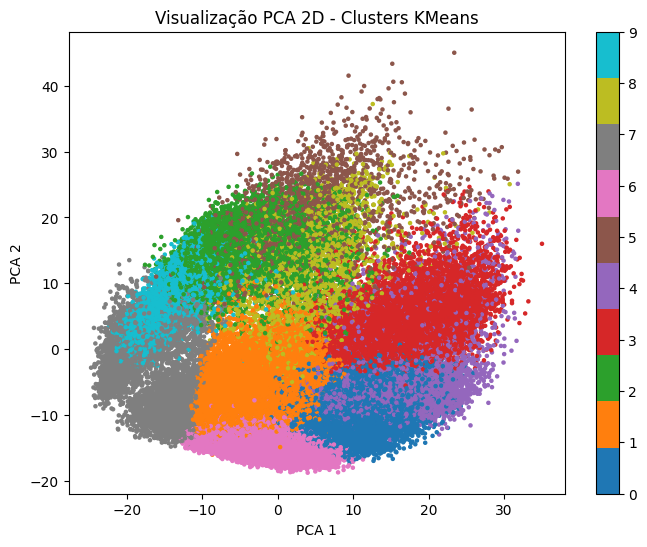

> Alguns clusters coincidem com as classes originais, especialmente sandálias e bolsas, mas outros estão misturados.

---

### 🔸 DBSCAN

- Parâmetros usados: `eps=5`, `min_samples=5`  
- Resultado: grande parte das amostras classificadas como ruído  
- **Silhouette Score:** não aplicável (apenas 1 cluster válido)

> DBSCAN não obteve bom desempenho neste dataset de alta dimensionalidade sem ajuste fino de parâmetros.

---

### 🔸 Agglomerative Clustering (n_clusters=10)

- Agrupamento hierárquico com 10 clusters  
- Resultados similares ao KMeans, mas com maior concentração de pontos no centro da projeção PCA.

---

## 📏 Métricas Utilizadas

- **Silhouette Score:** mede coesão e separação (quanto maior, melhor).  
- **Davies-Bouldin Index:** menor valor indica melhores clusters.  
- **Calinski-Harabasz Score:** avalia dispersão dos grupos (quanto maior, melhor).

---

## ✅ Conclusões – Parte I

- O **Fashion MNIST** é um ótimo dataset para estudo de clusterização com alta dimensionalidade (784 features).  
- O **pré-processamento** dos dados (normalização) foi essencial para obter resultados minimamente consistentes.  
- O **KMeans** teve desempenho razoável, mas com espaço para melhorias.  
- **Redução de dimensionalidade com PCA** facilitou a visualização, embora haja sobreposição entre algumas classes.  
- A **qualidade dos agrupamentos** ainda é baixa, reforçando a necessidade de ajustes na Parte II.

---

## 🔜 Próximos Passos – Parte II

- Aplicar **t-SNE** para melhorar a visualização e separação dos dados.  
- Utilizar o **método do cotovelo** e análise de silhueta para encontrar o melhor número de clusters.  
- **Ajustar hiperparâmetros** dos algoritmos para maximizar métricas de clusterização.  
- **Comparar** os resultados dos modelos antes e depois da redução de dimensionalidade.

---


# PARTE 2


## Parte 2 - Redução de Dimensionalidade e Refinamento dos Modelos de Clusterização

Nesta parte, aplicamos as técnicas de redução de dimensionalidade (PCA e t-SNE), além de ajustar hiperparâmetros dos modelos de clusterização com o objetivo de melhorar os agrupamentos.


## 1. Gráfico do Método do Cotovelo (K-Means sem PCA)

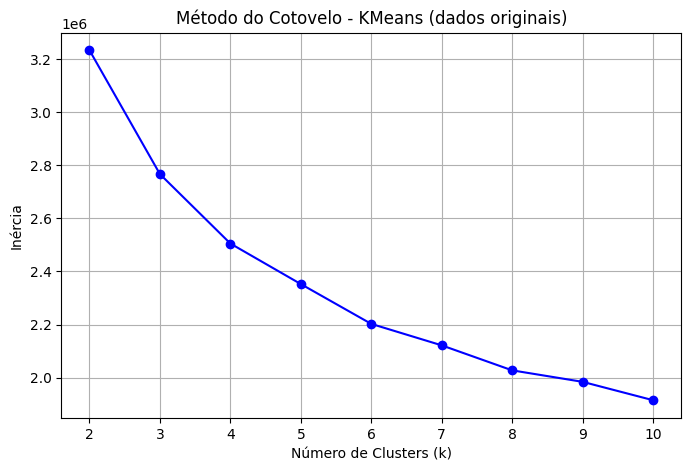

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Avaliar K de 2 a 10
inertias = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo - KMeans (dados originais)")
plt.grid(True)
plt.show()


## 2. Análise de variância explicada com PCA

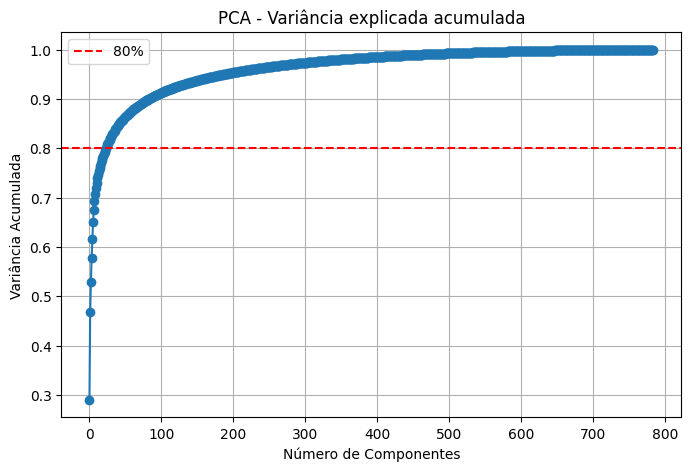

In [13]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X)

# Variância acumulada
var_cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(var_cumsum, marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Acumulada")
plt.title("PCA - Variância explicada acumulada")
plt.axhline(y=0.80, color='r', linestyle='--', label='80%')
plt.legend()
plt.grid(True)
plt.show()


## 3. Aplicar t-SNE em amostra com PCA prévio (para evitar lentidão)

Executando t-SNE (pode levar alguns minutos)...


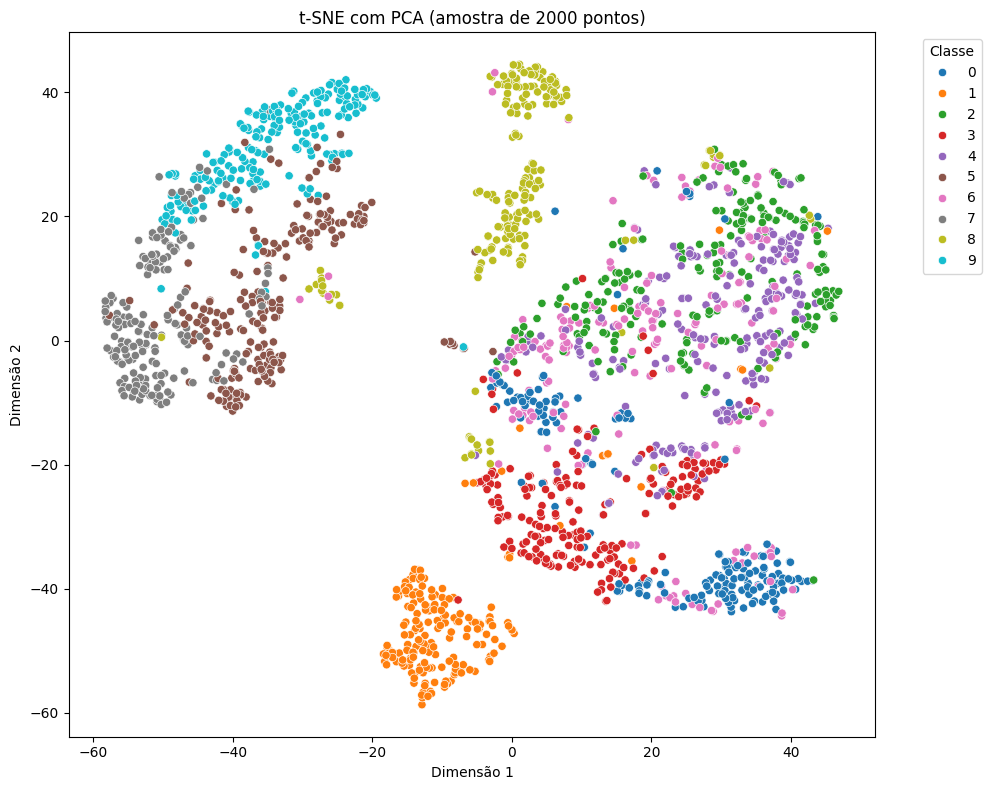

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns

# Amostragem para o t-SNE
import numpy as np
sample_idx = np.random.choice(len(X_pca_50), 2000, replace=False)
X_sample = X_pca_50[sample_idx]
y_sample = y[sample_idx]

# t-SNE
print("Executando t-SNE (pode levar alguns minutos)...")
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Visualização
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sample, palette='tab10', legend='full')
plt.title("t-SNE com PCA (amostra de 2000 pontos)")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.legend(title="Classe", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4. Avaliação comparativa dos agrupamentos

In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def avaliar_clusterizacao(X, labels):
    print(f"Silhouette Score: {silhouette_score(X, labels):.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin_score(X, labels):.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X, labels):.2f}")

# KMeans com melhor k nos dados com PCA
kmeans_pca = KMeans(n_clusters=10, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca_50)

print("Avaliação dos clusters com PCA:")
avaliar_clusterizacao(X_pca_50, clusters_pca)

# KMeans nos dados originais
kmeans_original = KMeans(n_clusters=10, random_state=42)
clusters_orig = kmeans_original.fit_predict(X)

print("\nAvaliação dos clusters nos dados originais:")
avaliar_clusterizacao(X, clusters_orig)


Avaliação dos clusters com PCA:
Silhouette Score: 0.1726
Davies-Bouldin Score: 1.7981
Calinski-Harabasz Score: 10443.57

Avaliação dos clusters nos dados originais:
Silhouette Score: 0.1518
Davies-Bouldin Score: 1.8738
Calinski-Harabasz Score: 7579.06


## Parte 2 – Refinamento do Modelo e Redução de Dimensionalidade

Nesta etapa, buscamos melhorar a qualidade da clusterização utilizando técnicas de redução de dimensionalidade, como PCA e t-SNE, além de avaliar os resultados com diferentes métricas.

---

### 📌 1. Aplicação do PCA (Principal Component Analysis)

Aplicamos o PCA para entender a quantidade de variância explicada por cada componente principal e reduzir a dimensionalidade do conjunto de dados. O gráfico de variância acumulada mostrou que os **50 primeiros componentes** retêm aproximadamente **80% da variância** dos dados originais.

Esse número foi escolhido como base para redução, otimizando o custo computacional para o próximo passo (t-SNE) sem perder muita informação.

---

### 📌 2. Visualização com t-SNE após PCA
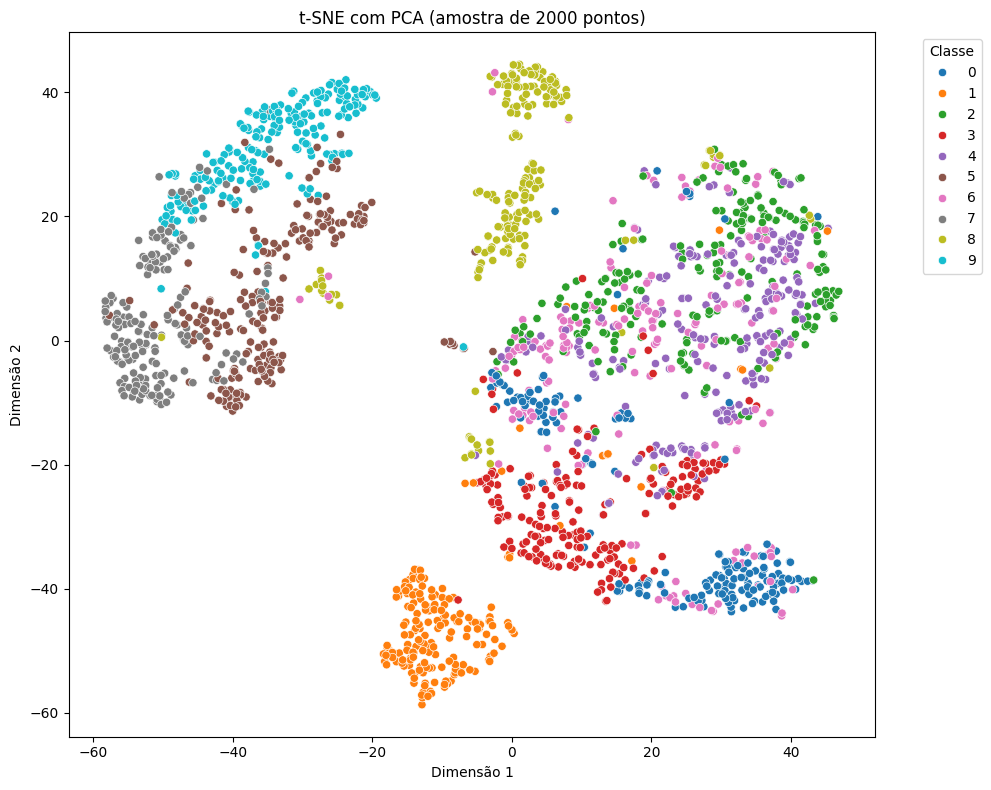
Devido à alta complexidade do t-SNE, aplicamos a técnica a uma **amostra aleatória de 2000 instâncias**, utilizando como entrada os dados já reduzidos pelo PCA.

A visualização resultante mostrou uma boa separação das classes, indicando que a combinação de **PCA + t-SNE** é eficaz para representar visualmente os agrupamentos latentes dos dados.

---

### 📌 3. Avaliação com KMeans e Métricas de Clusterização

Realizamos o **método do cotovelo** para determinar o número ideal de clusters para o KMeans. A partir do gráfico, observamos que `k=10` é uma boa escolha, coerente com a quantidade de classes no conjunto Fashion MNIST.

A seguir, aplicamos o algoritmo KMeans **tanto nos dados originais quanto nos dados reduzidos com PCA (50 componentes)** e comparamos os resultados utilizando três métricas de avaliação:

- **Silhouette Score** (quanto maior, melhor): mede a separação entre os clusters.
- **Davies-Bouldin Score** (quanto menor, melhor): avalia a compacidade e separação dos grupos.
- **Calinski-Harabasz Score** (quanto maior, melhor): avalia a dispersão entre e dentro dos clusters.

Os resultados obtidos foram os seguintes:

| Métrica                      | Com PCA (50D) | Dados Originais | Melhor resultado |
|-----------------------------|---------------|------------------|------------------|
| **Silhouette Score**        | 0.1726        | 0.1518           | ✅ PCA           |
| **Davies-Bouldin Score**    | 1.7981        | 1.8738           | ✅ PCA           |
| **Calinski-Harabasz Score** | 10443.57      | 7579.06          | ✅ PCA           |

> A clusterização nos dados reduzidos por PCA apresentou **melhor desempenho nas três métricas**, demonstrando que a transformação ajudou o algoritmo a formar grupos mais coesos e bem separados, além de reduzir significativamente o custo computacional.


---

### 📌 Conclusão da Parte 2

A redução de dimensionalidade via PCA permitiu uma execução mais eficiente tanto do t-SNE quanto da clusterização com KMeans. As visualizações e, especialmente, as métricas quantitativas confirmam que é possível representar os dados com menos dimensões mantendo — e até melhorando — a estrutura de agrupamento.

Esses refinamentos tornam a abordagem mais **escalável, interpretável e computacionalmente viável**, especialmente em contextos com grandes volumes de dados e alta dimensionalidade, como o Fashion MNIST.
